In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
!pip install yfinance


     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139064 sha256=713f9d1aeb629b1e72a44922b52c85098f0c3cd72c42f0592a61cc4d9a3af566
  Stored in directory: c:\users\pere amat\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


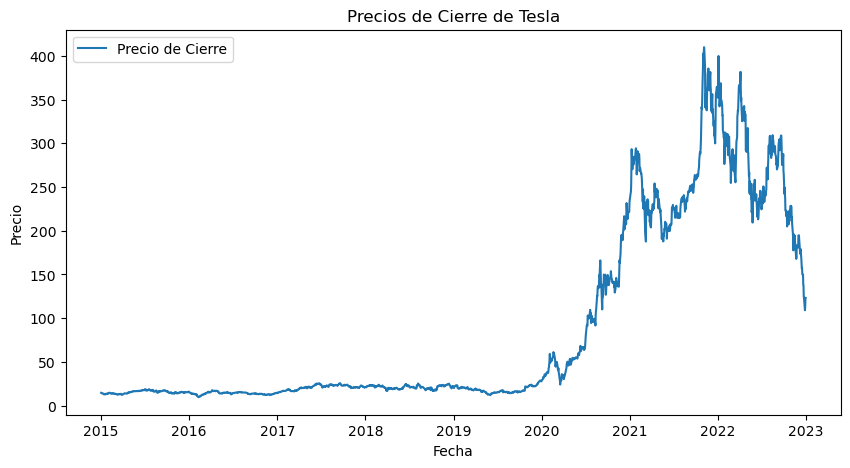

In [56]:
# Descargar datos históricos de Tesla desde Yahoo Finance
df = yf.download("TSLA", start="2015-01-01", end="2023-01-01")
print(data.head())

# Visualizar los precios de cierre
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Precio de Cierre')
plt.title('Precios de Cierre de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [58]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [60]:
# Dividir en características (X) y objetivo (y)
X = df.drop(columns=['Close'])
y = df['Close']

In [62]:
print("Forma de X:", X.shape)  # Ejemplo: (n_muestras, n_características)
print("Forma de y:", y.shape)  # Ejemplo: (n_muestras,)

Forma de X: (2014, 4)
Forma de y: (2014, 1)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Verificar las formas después de la división
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1611, 4)
y_train: (1611, 1)
X_test: (403, 4)
y_test: (403, 1)


In [70]:
# Escalar etiquetas (y)
scaler_y = MinMaxScaler()

# Convertir y_train y y_test a numpy antes de usar reshape
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))


## Construir y Entrenar un Modelo CNN

In [81]:
from tensorflow.keras import models, layers

# Crear el modelo CNN
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    # Segunda capa convolucional
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),

    # Aplanar los datos
    layers.Flatten(),

    # Capas densas
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    # Capa de salida
    layers.Dense(1, activation='linear')  # Predicción continua
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0464 - mae: 0.1307 - val_loss: 6.1169e-04 - val_mae: 0.0179
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - mae: 0.0382 - val_loss: 2.1181e-04 - val_mae: 0.0107
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0321 - val_loss: 2.2888e-04 - val_mae: 0.0112
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mae: 0.0302 - val_loss: 0.0013 - val_mae: 0.0234
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0344 - val_loss: 5.3061e-04 - val_mae: 0.0165
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - mae: 0.0282 - val_loss: 2.0413e-04 - val_mae: 0.0112
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mae: 0.0274 - val_loss: 2.7044e-04 - val_mae: 0.0119
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mae: 0.0294 - val_loss: 8.4821e-04 - val_mae: 0.0227
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms